In [1]:
!pip install onnxruntime
!pip install onnx
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 7.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib as plt
import tensorflow as tf
import numpy as np
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.utils import to_categorical

2024-01-20 19:04:38.015270: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-20 19:04:38.018012: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-20 19:04:38.047687: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-20 19:04:38.047726: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-20 19:04:38.047747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
data=pd.read_csv('./DentalData3011.csv')
print(len(data))

424


In [3]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Do the ulcers interfere with daily activities,318,0.750000
Is there bleeding from the ulcer,317,0.747642
Have you had similar ulcers?,317,0.747642
Is the ulcer painful,316,0.745283
Has the ulcer changed since first noticed?,316,0.745283
Is there a foul smell from the ulcer?,316,0.745283
Is there discharge from the ulcer?,316,0.745283
"Does the swelling changes during normal activities such as eating, speaking, etc?",315,0.742925
Is the swelling painful?,314,0.740566
Has the swelling changed since it was first noticed? If yes how quickly?,313,0.738208


In [4]:
data['Chief complaint']=data['Chief complaint'].str.replace('Ulecer','Ulcer')
correct_pulp={
    'Pulpits':'Pulpitis',
    'pulpits':'Pulpitis',
    'pulpitts':'Pulpitis',
    'pulpitis':'Pulpitis',
    'Periodontitis with grade two mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade three mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade one mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 1 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 2 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 3 mobility':'Chronic Destructive Periodontitis',
    'Periodontitis with mobility of tooth':'Chronic Destructive Periodontitis',
    'Periodontitis with grade 2 tooth mobility':'Chronic Destructive Periodontitis',
    'Gingivitis':'Acute gingivitis',
    'gingivitis':'Gingivitis'

}
for word, correct in correct_pulp.items():
    data['Final Diagnosis']=data['Final Diagnosis'].str.replace(word,correct)
data.fillna("No",inplace=True)

In [5]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data.head(20)

,Total,Percent
Timestamp,0,0.0
Is there bleeding from the ulcer,0,0.0
Is there pain in the gums,0,0.0
Is there bleeding in the gums?,0,0.0
Final Diagnosis,0,0.0
Have you had similar ulcers?,0,0.0
Has the ulcer changed since first noticed?,0,0.0
Do the ulcers interfere with daily activities,0,0.0
Is there a foul smell from the ulcer?,0,0.0
Is there discharge from the ulcer?,0,0.0


In [6]:
data.drop('Timestamp',axis=1,inplace=True)
data.drop('Patient Number',axis=1,inplace=True)

20


<AxesSubplot:xlabel='count', ylabel='Final Diagnosis'>

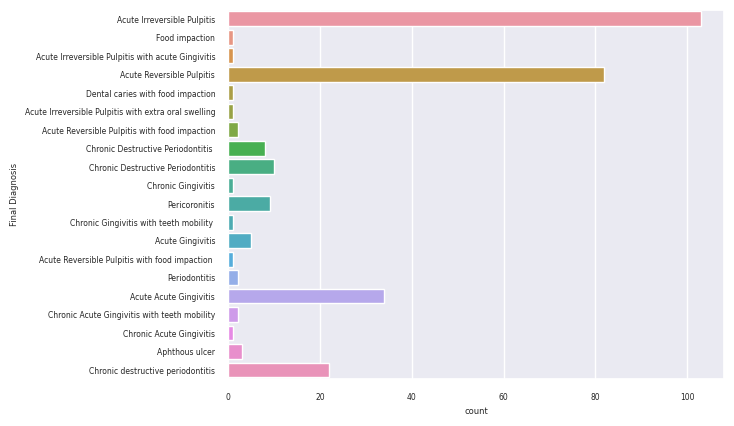

In [7]:
#collecting only the data with Chief complaint: Pain
pain_df=data[data["Chief complaint"]=='Pain']
y_pain=pain_df['Final Diagnosis']
print(len(y_pain.unique()))
sns.set(font_scale=0.5)
sns.countplot(y=y_pain, label="Number of cases")

In [8]:
encoder = OrdinalEncoder(dtype=float)
pain_encode=pd.DataFrame(encoder.fit_transform(pain_df),columns=pain_df.columns)

In [9]:
train,test=train_test_split(pain_encode,test_size=0.2,random_state=42)
print(len(train))
print(len(test))

232
58


In [10]:
X_train = train.drop(columns=['Final Diagnosis'])
y_train = train['Final Diagnosis']


X_test = test.drop(columns=['Final Diagnosis'])
y_test = test['Final Diagnosis']

In [11]:
# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train, num_classes=20)
y_test_one_hot = to_categorical(y_test, num_classes=20)

In [12]:
model = tf.keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[18]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(20, activation="softmax")
])

2024-01-20 19:04:45.881866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-20 19:04:45.938033: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [13]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train_one_hot, epochs=200, verbose=1, validation_data=(X_test, y_test_one_hot))

Epoch 1/200
8/8 [==============================] - 1s 27ms/step - loss: 2.8303 - accuracy: 0.2888 - val_loss: 2.6136 - val_accuracy: 0.3966
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 2.3158 - accuracy: 0.3448 - val_loss: 2.1350 - val_accuracy: 0.3966
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 1.8860 - accuracy: 0.3448 - val_loss: 2.0386 - val_accuracy: 0.3966
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 1.6858 - accuracy: 0.5862 - val_loss: 1.9030 - val_accuracy: 0.5517
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 1.4931 - accuracy: 0.6207 - val_loss: 1.7741 - val_accuracy: 0.5517
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 1.3099 - accuracy: 0.6250 - val_loss: 1.7002 - val_accuracy: 0.5517
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 1.1612 - accuracy: 0.6422 - val_loss: 1.7098 - val_accuracy: 0.6552
Epoch 8/200
8/8 [=========